# K-means with ready made dataset (iris dataset)

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-preview2-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview2-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1Ail63WTPdCltm0io6p6RNaMeKPVWWdnQ'
file_id2 = '1Kiq16AfVxPh7on8q3EL7P2JQvMgFraaX'
file_id3 = '1PU-GraBLU2KCatlSbKo_3LlSxxKCXbxh'
downloaded = drive.CreateFile({'id': file_id})
downloaded2 = drive.CreateFile({'id': file_id2})
downloaded3 = drive.CreateFile({'id': file_id3})
downloaded.GetContentFile('iris.data')
downloaded2.GetContentFile('train_data.csv')
downloaded3.GetContentFile('test_data.csv')

In [0]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import re
from collections import defaultdict

In [0]:
train_20_data = pd.read_csv('train_data.csv',sep='\t')
test_20_data = pd.read_csv('test_data.csv',sep='\t')


In [0]:
train_20_data

,target,text
0,0,From: mathew <mathew@mantis.co.uk> Subject: Al...
1,0,From: mathew <mathew@mantis.co.uk> Subject: Al...
2,0,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
3,0,From: mathew <mathew@mantis.co.uk> Subject: Re...
4,0,From: strom@Watson.Ibm.Com (Rob Strom) Subject...
...,...,...
4572,7,From: cmort@NCoast.ORG (Christopher Morton) Su...
4573,7,From: fcrary@ucsu.Colorado.EDU (Frank Crary) S...
4574,7,Nntp-Posting-Host: surt.ifi.uio.no From: Thoma...
4575,7,From: cmort@NCoast.ORG (Christopher Morton) Su...


In [0]:
dataset = pd.read_csv("iris.data",names = ["sepal length", "sepal width", "petal length", "petal width", "class"])
dataset.pop("class")
data = dataset.values
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
def norm(data, norm_data):
    train_stats = data.describe()
    train_stats = train_stats.transpose()
    return(norm_data - train_stats['mean'])// train_stats['std']

In [0]:
iris_df = norm(dataset,dataset)

In [0]:
from sklearn.model_selection import train_test_split
def split(Xdata,ratio):
    x_train, x_test,  = train_test_split(Xdata, test_size=ratio,random_state=0)
    return x_train,x_test,

x_train,x_test = split(dataset,0.2)
print(x_train.shape)
print(x_test.shape)

In [0]:
x_train = x_train.values
x_test = x_test.values

In [0]:
def get_dist(data, centroid):
  con = []
  for mean in centroid:
    count = 0
    for i in range(len(data)):
      count = count + (mean[i] - data[i])**2
    count = np.sqrt(count)
    con.append(count)
  centroid = con.index(min(con))
  return centroid


In [0]:
def new_centroid(centroid):
  cent = []
  for i in range(len(centroid)):
    d =  "list_"+str(i)
    data_points = centroid[d]
    mean = np.sum(data_points,axis = 0)/len(data_points)

    cent.append(mean)
  cent = np.asarray(cent)
  return cent



In [0]:
def predict(test, center):
  predicted = []
  for i in range(len(test)):
    mean = get_dist(test[i],center)
    predicted.append(mean)
  predicted = np.asarray(predicted)
  return predicted


In [0]:
def check_convergence(new,old):
  cont = []
  for ol,ne in zip(old,new):
    dist = 0
    for i in range(len(ol)):
      
     dist = dist + (ol[i]-ne[i])**2
    dist = np.sqrt(dist)
    cont.append(dist)
  error = np.sum(cont)/len(cont)
  return error

    

In [0]:
def get_WSS(knn, data1,max_iter = 100):
  clusters,center = K_means(knn,data1,max_iter)
  
  oavdi = []
  for i,cent in zip(range(len(clusters)),center):
    dd =  "list_"+str(i)
    clust = clusters[dd]
    avdi = []
    for x_inst in (clust):
      di = 0
      for i in range(len(x_inst)):
        di = di + (x_inst[i] - cent[i])**2
      di = np.sqrt(di)
      avdi.append(di)
    ssum = np.sum(avdi)/len(avdi)
    oavdi.append(ssum)
  WSS = np.sum(oavdi)/len(oavdi)

  return WSS

In [0]:
def K_means(k,data,max_iter,tolerance = 0.0001,):
  centers = data[:k]
  for epock in range(max_iter):
    my_centroids = defaultdict(list)
    for j in range(k):
      my_centroids['list_' + str(j)]
    for i in range(len(data)):
      data_center = get_dist(data[i],centers)
      x =  "list_"+str(data_center)
      my_centroids[x].append(data[i])
    
    n_centroid = new_centroid(my_centroids)
    check = check_convergence(n_centroid, centers)
    centers = n_centroid
    if check <tolerance:
      print("converged")
      return my_centroids,n_centroid 
    else:
      print("not converged, Error = ",check)
  #return n_centroid
  




In [0]:
# Parameter K optimization
res = []
kn = []
for k in range(2,10):
  print(k)
  out = get_WSS(k, x_train)
  res.append(out)
  kn.append(k)


2
not converged, Error =  1.1703436049569436
not converged, Error =  0.3810279899284922
not converged, Error =  0.3649807017158003
not converged, Error =  0.18775418669066357
not converged, Error =  0.044406764064707824
converged
3
not converged, Error =  0.3799495854838304
not converged, Error =  0.05605100360073006
not converged, Error =  0.030574191677110975
not converged, Error =  0.06549439479669787
not converged, Error =  0.031251277384080844
not converged, Error =  0.031977280675188395
converged
4
not converged, Error =  0.458619744292168
not converged, Error =  0.04595444973148596
not converged, Error =  0.011564790171128004
converged
5
not converged, Error =  0.45707810519955777
not converged, Error =  0.13861358459645917
not converged, Error =  0.10883965815708399
not converged, Error =  0.018670427020739424
converged
6
not converged, Error =  0.38572233940904205
not converged, Error =  0.1407323932617319
not converged, Error =  0.11700842836939161
not converged, Error =  0.0

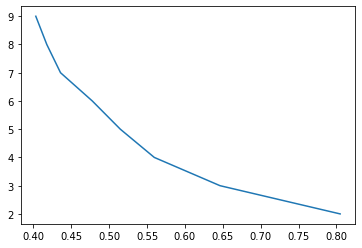

In [0]:
plt.plot(res,kn)

In [0]:
centroids_dict , clust = K_means(3,x_train,100)

not converged, Error =  0.3799495854838304
not converged, Error =  0.05605100360073006
not converged, Error =  0.030574191677110975
not converged, Error =  0.06549439479669787
not converged, Error =  0.031251277384080844
not converged, Error =  0.031977280675188395
converged


In [0]:
pred = predict(x_test,clust)
pred = np.asarray(pred)
pred

array([1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2])

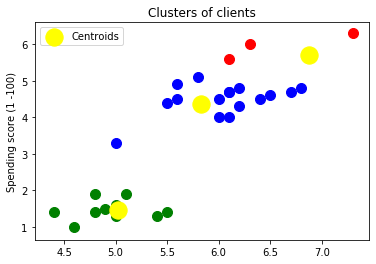

In [0]:
plt.scatter(x_test[pred==0,0], x_test[pred==0,2], s = 100, c = 'red', )
plt.scatter(x_test[pred==1,0], x_test[pred==1,2], s = 100, c = 'blue', )
plt.scatter(x_test[pred==2,0], x_test[pred==2,2], s = 100, c = 'green',)
plt.scatter(x_test[pred==3,0], x_test[pred==3,2], s = 100, c = 'cyan',)
plt.scatter(x_test[pred==4,0], x_test[pred==4,2], s = 100, c = 'magenta',)
plt.scatter(clust[:,0], clust[:,2], s = 300, c = 'yellow', label ='Centroids')
plt.title('Clusters of clients')
plt.ylabel('Spending score (1 -100)')
plt.legend()
plt.show()

# K-means with Raw dataset

In [15]:
train_20_data.drop_duplicates(inplace = True)
test_20_data.drop_duplicates(inplace = True)
train_20_data.isnull().sum()
test_20_data.isnull().sum()
print(train_20_data.shape)
print(test_20_data.shape)

(4577, 2)
(3048, 2)


In [16]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
def process_text(text):
    cont = []
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [0]:
processed_train = train_20_data["text"].apply(process_text)
processed_test = test_20_data["text"].apply(process_text)

In [19]:
processed_train

0       From mathew mathewmantiscouk Subject AltAtheis...
1       From mathew mathewmantiscouk Subject AltAtheis...
2       From I3150101dbstu1rztubsde Benedikt Rosenau S...
3       From mathew mathewmantiscouk Subject Re univer...
4       From stromWatsonIbmCom Rob Strom Subject Re so...
                              ...                        
4572    From cmortNCoastORG Christopher Morton Subject...
4573    From fcraryucsuColoradoEDU Frank Crary Subject...
4574    NntpPostingHost surtifiuiono From Thomas Parsl...
4575    From cmortNCoastORG Christopher Morton Subject...
4576    From feustelnetcomcom David Feustel Subject Th...
Name: text, Length: 4577, dtype: object

In [0]:
def prep2(processe):
  list_data = []
  for d in processe:
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', d)
    tmp = []
    for i in text:
      if not i.isdigit():
        tmp.append(i)
    joint = [''.join(tmp)]   
    f = []
    sop =[n.split() for n in joint]
  
    for job in sop[0]:
      if len(job)<15:
        f.append(job)
 
    joint = ' '.join(f)
  
  
  #new_joint = "".join(temp)


    list_data.append(joint)
  return list_data 
def prep(processe):
  list_data = []
  for d in processe:
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', d)
    tmp = []
    for i in text:
      if not i.isdigit():
        tmp.append(i)
    joint = [''.join(tmp)]   
    f = []
    sop =[n.split() for n in joint]
  
    for job in sop[0]:
      if len(job)>3:
        f.append(job)
 
    joint = ' '.join(f)
  
  
  #new_joint = "".join(temp)


    list_data.append(joint)
  return list_data 
x_train2 = prep(processed_train)
x_test2 = prep(processed_test)
x_train2 = prep2(x_train2)
x_test2 = prep2(x_test2)
#x_test2

In [0]:

def reduce(data):
  cont = []
  data = np.array(data)
  for i in range(len(data)):
    if len(data[i].split()) > 3:
      cont.append(data[i])
  return cont


In [0]:
n_x_train= reduce(x_train2)
n_x_test= reduce(x_test2)

In [0]:
from sklearn.utils import shuffle
x_train2,y_train2 = shuffle(x_train2,train_20_data["target"].values, random_state=0)
x_test2, y_test2 = shuffle(x_test2,test_20_data["target"].values,random_state = 0)

In [0]:
print(len(n_x_train))
print(len(n_x_test))
n_x_train

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=0., max_df=1.0)
vect2 = CountVectorizer(min_df=0., max_df=1.0)
messages_bow1 = vect.fit_transform(x_train2)
messages_bow2 = vect2.fit_transform(x_test2)
x_train2 = pd.DataFrame(messages_bow1.A, columns=vect.get_feature_names())
x_test2 = pd.DataFrame(messages_bow2.A, columns=vect2.get_feature_names())
##x_train2 = messages_bow1.A
#x_test2 = messages_bow2.A

In [49]:
x_train2

,aaaa,aaah,aaai,aaaimit,aacc,aaffff,aafffff,aakeplerunhedu,aalborg,aamazing,aamir,aanbieden,aanerud,aangeboden,aangezien,aaplayexe,aarhus,aario,aarm,aaron,aarons,aaronson,aarp,aarskog,aaspocwruedu,aasunpanixcom,aatchoo,aaxclear,abacus,abad,abandon,abandoned,abandoning,abatement,abates,abberation,abbie,abbott,abbreviation,abbreviations,...,zoning,zonkercmuedu,zoom,zooming,zoomingin,zoomins,zooms,zopfi,zorasterism,zorg,zork,zorns,zortech,zqqwxymnm,zruty,zsofts,zubkoff,zues,zuiko,zulu,zumbo,zumdahl,zumder,zurich,zurlo,zusman,zvonko,zvtkmjobmffsqm,zwart,zwhwx,zyklonb,zyxel,zzzs,ªl,çait,èresalle,égligent,élangea,érale,íålittin
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
print(x_train2.shape)
print(x_test2.shape)


(4577, 44792)
(3048, 36206)


In [0]:
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint
from pyspark import SparkContext
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

In [0]:
sc = SparkContext()

In [0]:
spark = SparkSession(sc)

In [0]:
x_train2.insert(0,"tar",y_train2)


In [0]:
data = spark.createDataFrame(x_train2)
data2 = spark.createDataFrame(x_test2)
data = data.rdd

In [0]:
new_data = data.map(lambda line: LabeledPoint(line[0],[line[1:]]))
new_data2 = data2.map(lambda line: LabeledPoint(line[0],[line[1:]]))

In [40]:
new_data

PythonRDD[10] at RDD at PythonRDD.scala:53

In [0]:
new_data.write.format("libsvm").save("x_train_libsvm")
new_data2.write.format("libsvm").save("x_test_libsvm")

In [0]:
res = []
kn = []
start_time = time.time()
for k in range(2,10):
  print(k)
  out = get_WSS(k, x_train2.values)
  res.append(out)
  kn.append(k)
plt.plot(res,kn)
print("--- %s seconds ---" % (time.time() - start_time))

In [57]:
start_time = time.time()
centroids_dict , clust = K_means(7,x_train2.values[:2000],100)
print("--- %s seconds ---" % (time.time() - start_time))

not converged, Error =  20.09796454902125
not converged, Error =  30.39635096078887
not converged, Error =  16.146170229070684
not converged, Error =  42.95489255294964
not converged, Error =  0.1167784487892843
not converged, Error =  0.02343276391464147
not converged, Error =  0.0205357957434063
not converged, Error =  0.011451602577385409
not converged, Error =  0.013488963547100243
converged
--- 5522.317501068115 seconds ---


In [58]:
pred = predict(x_test2,clust)
pred = np.asarray(pred)
pred

array([2, 2, 2, ..., 2, 0, 2])

In [0]:
def Accuracy(test,pred):
    count = 0
    for x,j in zip(test,pred):
        if x == j:
            count += 1
    accuracy = (count/float(len(test)))*100
    return accuracy

In [61]:
testtt = train_20_data["target"].values
accu = Accuracy(y_test2, pred)
print("accuracy from my model", accu, "percent")

accuracy from my model 85.748 percent


# comparism with off the shelf libraries

In [0]:
from sklearn.cluster import KMeans

In [0]:
WCSS = []
start_time = time.time()
for i in range(1, 10):
    
    kmeans = KMeans(n_clusters = i, random_state = 0,init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(x_train2.values)
    #To calculate the distance 
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,25),WCSS )
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

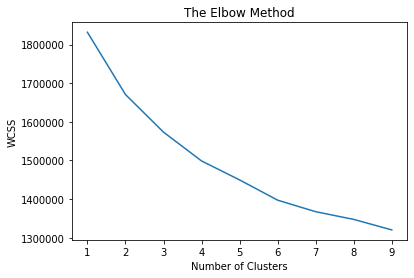

--- 692.9214441776276 seconds ---


In [0]:
plt.plot(range(1,10),WCSS )
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

In [51]:
kmeans = KMeans(n_clusters = 7, random_state = 0,init = 'k-means++', max_iter = 300, n_init = 10)

start_time = time.time()
kmeans.fit(x_train2.values)
print("--- %s seconds ---" % (time.time() - start_time))

--- 76.24086427688599 seconds ---


In [0]:
y_test2 = test_20_data["target"].values

In [55]:
pred2 = kmeans.predict(x_test2.values)
accuu = Accuracy(y_test2, pred2)
print("Accuracy of sklearn model: ", accuu , "percent"  )

Accuracy of sklearn model:  89.0986 percent
